In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import transforms as T
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.visualizer import Visualizer

In [11]:
cfg = get_cfg()
cfg.merge_from_file("configs/retinanet_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "models/model_final_5bd44e.pkl"

Loading config configs/./Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [12]:
predictor = DefaultPredictor(cfg)

In [4]:
data_loader = build_detection_test_loader(cfg, "coco_2017_val")
evaluator = COCOEvaluator("coco_2017_val", cfg, True)
results = inference_on_dataset(predictor.model, data_loader, evaluator)
print(results)

No predictions from the model!


In [5]:
img = Image.open("images/street.jpg")

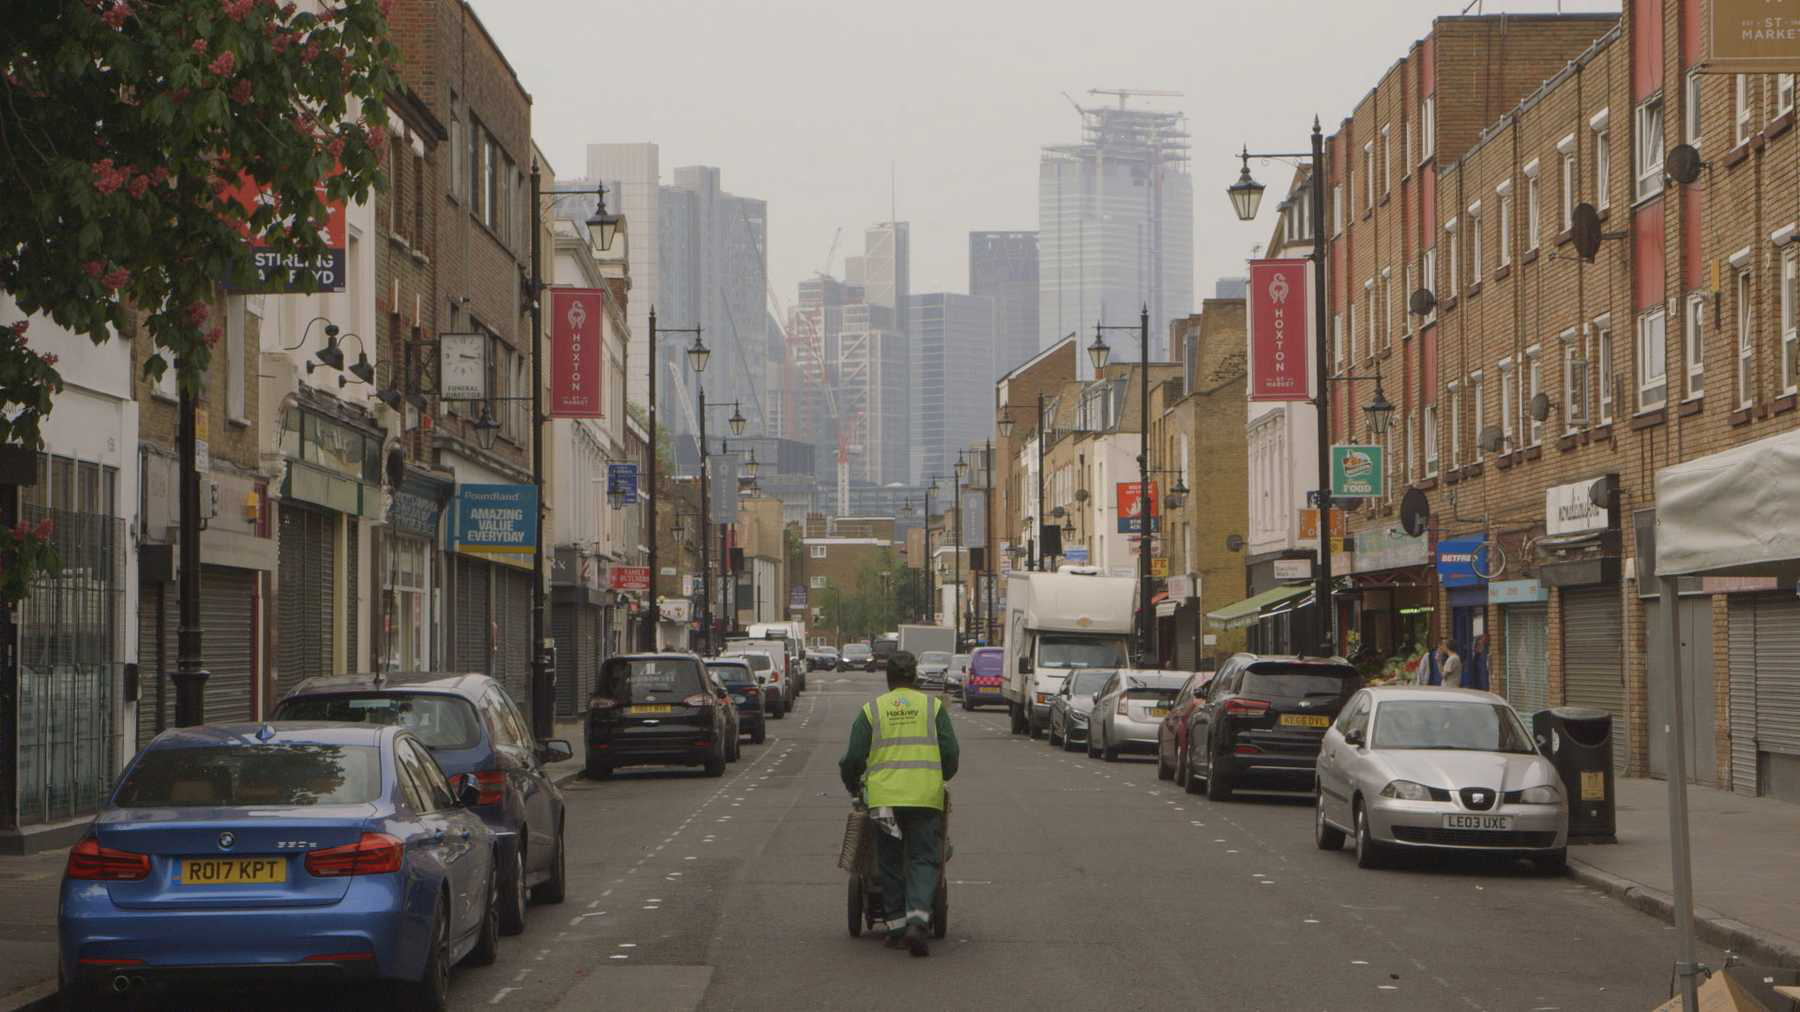

In [6]:
img

In [14]:
predictions = predictor(np.array(img))
print(predictions)

{'instances': Instances(num_instances=100, image_height=1012, image_width=1800, fields=[pred_boxes: Boxes(tensor([[1.3134e+03, 6.8622e+02, 1.5709e+03, 8.7314e+02],
        [5.7381e+01, 7.1727e+02, 5.1074e+02, 9.9747e+02],
        [1.1746e+03, 6.5276e+02, 1.3654e+03, 8.0191e+02],
        [2.4465e+02, 6.6571e+02, 5.8099e+02, 9.0779e+02],
        [5.8349e+02, 6.5185e+02, 7.3587e+02, 7.8126e+02],
        [8.4189e+02, 6.5302e+02, 9.6066e+02, 9.5564e+02],
        [1.0864e+03, 6.7148e+02, 1.1943e+03, 7.6173e+02],
        [1.0032e+03, 5.7100e+02, 1.1395e+03, 7.4207e+02],
        [1.0486e+03, 6.6266e+02, 1.1279e+03, 7.4925e+02],
        [7.0601e+02, 6.6039e+02, 7.6777e+02, 7.4363e+02],
        [7.2388e+02, 6.4663e+02, 7.8919e+02, 7.2005e+02],
        [1.1555e+03, 6.6728e+02, 1.2145e+03, 7.8257e+02],
        [9.6206e+02, 6.4546e+02, 1.0052e+03, 7.1024e+02],
        [9.1585e+02, 6.5172e+02, 9.5552e+02, 6.9111e+02],
        [8.3968e+02, 6.4390e+02, 8.7081e+02, 6.7060e+02],
        [1.4336e+03, 6.4

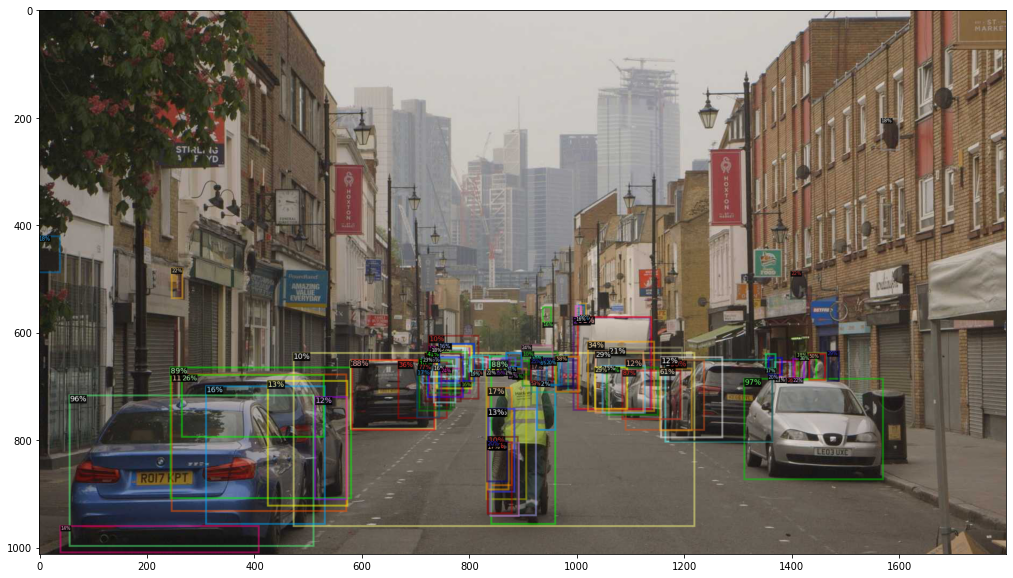

In [16]:
visualizer = Visualizer(np.array(img))
instances = predictions["instances"].to("cpu")
vis_img = visualizer.draw_instance_predictions(instances)
vis_img = vis_img.get_image()
plt.figure(figsize=(20, 10))
plt.imshow(vis_img)
plt.show()